In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import algo

In [56]:
path = 'tm'
tms = {}
for r,d,f in os.walk(path):
    for file in f:
        tms[file] = np.load(path+'/'+file)
        

In [57]:
target_models = {}
for tm in tms:
    target_models[tm] = algo.LogisticRegression_DPSGD()
    target_models[tm].theta = tms[tm]

In [59]:
x_target_train = np.load('x_target_train.npy')
y_target_train = np.load('y_target_train.npy')
x_target_test = np.load('x_target_test.npy')
y_target_test = np.load('y_target_test.npy')

In [60]:
accuracy = {'train': {}, 'test': {}}
for model in target_models:
    accuracy['train'][model] = target_models[model].evaluate(x_target_train, y_target_train)
    accuracy['test'][model] = target_models[model].evaluate(x_target_test, y_target_test)

In [61]:
alpha          = 0.001
max_iter       = 100
lambda_        = 1e-5
tolerance      = 1e-5
DP             = True
L              = 1
epsilon        = 0.1


tm_path = f'lr{alpha}_iter{max_iter}_reg{lambda_}_DP{DP}_'
if DP:
    tm_path += f'eps{epsilon}_L{L}_'
tm_path        

'lr0.001_iter100_reg1e-05_DPTrue_eps0.1_L1_'

In [66]:
res = {}
plot_train = []
plot_test = []

for epsilon in np.arange(0.1,1.1,0.1):
    DP             = True
    L              = 1
#     epsilon        = 0.1
    tm_path = f'lr{alpha}_iter{max_iter}_reg{lambda_}_DP{DP}_'
    if DP:
        tm_path += f'eps{epsilon}_L{L}_'
        
    for model in target_models:
        if tm_path  in model:
            print(model)
            res[model] = (accuracy['train'][model], accuracy['test'][model])
            plot_train.append(accuracy['train'][model])
            plot_test.append(accuracy['test'][model])
plt.plot(plot_train)

lr0.001_iter100_reg1e-05_DPTrue_eps0.1_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.2_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.4_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.5_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.6_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.8_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.9_L1_target_model.npy


In [77]:
res = {}
plot_train = []
plot_test = []


eps = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,5,10]

for epsilon in eps:
    for model in target_models:
        if 'lr0.001_iter100_reg1e-05_DPTrue_' in model and '_L1_target_model.npy' in model and '_eps'+str(epsilon)+'_' in model:
            print(model)
            res[model] = (accuracy['train'][model], accuracy['test'][model])
            plot_train.append(accuracy['train'][model])
            plot_test.append(accuracy['test'][model])


lr0.001_iter100_reg1e-05_DPTrue_eps0.1_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.2_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.3_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.4_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.5_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.6_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.7_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.8_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps0.9_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps1_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps5_L1_target_model.npy
lr0.001_iter100_reg1e-05_DPTrue_eps10_L1_target_model.npy


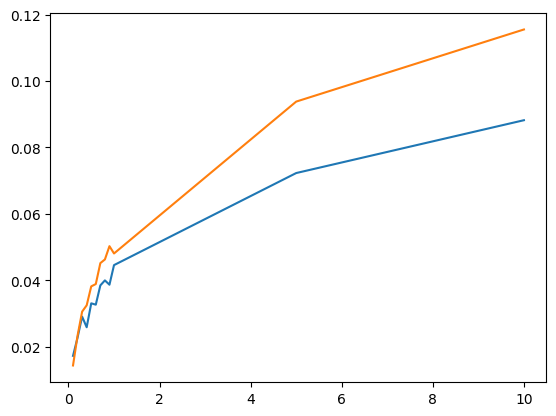

In [87]:
plt.plot(eps,plot_test)
plt.plot(eps,plot_train)
# plt.xscale('log')

In [ ]:
with open('test_model_param_save.json', 'r') as fp:
    data = json.load(fp)